# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [150]:
# Below we are importing the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [151]:
# This loads the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [152]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [153]:
# Below is the monthly household income for the member
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [154]:
# Setting variables for the Free Crypto API Call endpoint URLs for the cryptocurrencies
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [155]:
# This uses the Python requests library to make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# The json.dumps function reviews the response data from the API call
# The indent and sort_keys parameters make the response object more readable to the user
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18920987,
            "id": 1,
            "last_updated": 1641422507,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 804164335101,
                    "percent_change_1h": -1.92405116922927,
                    "percent_change_24h": -7.75880621653896,
                    "percent_change_7d": -10.5024230806707,
                    "percentage_change_1h": -1.92405116922927,
                    "percentage_change_24h": -7.75880621653896,
                    "percentage_change_7d": -10.5024230806707,
                    "price": 42713.0,
                    "volume_24h": 28719638542
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18920987,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [156]:
# This uses the Python requests library to make an API call to access the current price of ETH
eth_response = requests.get(eth_url).json()

# The json.dumps function reviews the response data from the API call
# The indent and sort_keys parameters make the response object more readable to the user
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119039735,
            "id": 1027,
            "last_updated": 1641422600,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 409009060374,
                    "percent_change_1h": -1.70613865058704,
                    "percent_change_24h": -8.39560447777332,
                    "percent_change_7d": -7.98140172923571,
                    "percentage_change_1h": -1.70613865058704,
                    "percentage_change_24h": -8.39560447777332,
                    "percentage_change_7d": -7.98140172923571,
                    "price": 3503.48,
                    "volume_24h": 16014127506
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119039735,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [157]:
# This coding allows us to navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Printing the current price of BTC
print(btc_price)

42713.0


In [158]:
# This coding allows us to navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Printing the current price of ETH
print(eth_price)

3503.48


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [159]:
# This calculates the current value of the members BTC holding 
btc_value = btc_coins * btc_price

# Printing current value of the members holding in BTC
print(btc_value)

51255.6


In [160]:
# This calculates the current value of the members ETH holding 
eth_value = eth_coins * eth_price

# Printing current value of the members holding in ETH
print(eth_value)

18568.444


In [161]:
# This calculates the total value of the members cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Printing the members current cryptocurrency wallet balance
print(total_crypto_wallet)

69824.044


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [162]:
# This is the current amount of shares held in both the stock (SPY) and bond (AGG) portion of the members portfolio
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [163]:
# Setting variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# This creates the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [164]:
# This sets the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# This sets timeframe to 1 day
timeframe = '1D'

# The following formats the current date as ISO format
# Set both the start and end date at the date of your prior weekday 
start_date = pd.Timestamp("2021-12-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-29", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [165]:
# This uses the Alpaca get_barset function to get the current closing prices the members portfolio
closing_prices = alpaca.get_barset(tickers,timeframe,start=start_date,end=end_date
).df


# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
closing_prices.head()

AGG                                   SPY  \
                             open    high     low   close   volume open   
time                                                                      
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959  477   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [166]:
# This allows us to access the closing price for AGG from the Alpaca DataFrame
agg_close_price = float(closing_prices['AGG']['close'])

# Printing the AGG closing price
print(agg_close_price)

113.87


In [167]:
# This allows us to access the closing price for SPY from the Alpaca DataFrame
spy_close_price = float(closing_prices['SPY']['close'])

# Printing the SPY closing price
print(spy_close_price)

477.46


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [168]:
# This calculates the current value of the bond portion of the members portfolio
# by multiplying the closing price by the number of shares
agg_value = agg_close_price * agg_shares

# Printing the current value of the members bond portfolio
print(agg_value)

22774.0


In [169]:
# This calculates the current value of the stock portion of the members portfolio
# by multiplying the closing price by the number of shares
spy_value = spy_close_price * spy_shares

# Printing the current value of the members stock portfolio
print(spy_value)

52520.6


In [170]:
# Here we calculate the total value of the stock and bond portion of the portfolio by adding them together
total_stocks_bonds = agg_value + spy_value

# Printing the current balance of the members stock and bond portion of the portfolio
print(total_stocks_bonds)

75294.6


In [171]:
# And finally, we can calculate the total value of the member's entire savings portfolio
# By adding the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Printing the members total portfolio balance
print(total_portfolio)

145118.644


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [172]:
# Here we consolidate the members financial assets data into a list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Printing the list for confirmation
print(savings_data)

[69824.044, 75294.6]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [173]:
# Now we can create a DataFrame of the financial assets
savings_df = pd.DataFrame(savings_data, columns = ['amount'], index = ['crypto', 'stock/bond'])

# This displays the dataframe with appropriate columns and index names
display(savings_df)

,amount
crypto,69824.044
stock/bond,75294.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Value of Portfolio: Crypto and Stocks + Bonds'}, ylabel='amount'>

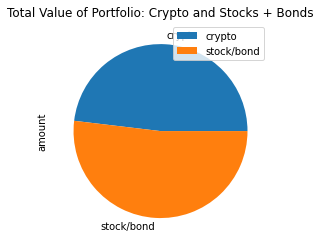

In [174]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title = 'Total Value of Portfolio: Crypto and Stocks + Bonds')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [175]:
# Starting the process to determine if the member has enough asset in their portfolio to create an emergency fund
# so we start by setting the preferred emergency fund value as three times the members monthly income
emergency_fund_value = monthly_income * 3
print(emergency_fund_value)

36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [176]:
# Here we can determine if the member has enough assets in their portfolio to create an emergency fund
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough assets in your total portfolio to have an emergency fund.')
elif total_portfolio == emergency_fund_value:
    print('Congratulations! You have just enough asset in your total portfolio.')
else:
    print(f"You will need ({emergency_fund_value} - {total_portfolio}) to reach your goal of starting an emergency fund.")

Congratulations! You have enough assets in your total portfolio to have an emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [177]:
# Here we set a 3 years worth of historical closing prices
start_date = pd.Timestamp('2019-01-04', tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2022-01-03', tz = "America/New_York").isoformat()
# This sets the number of rows to 1000, in order to reach the maximum amount of data
limit_rows = 1000

In [178]:
# Here we are making the API call to look at 3 years worth of data, using tickers from earlier in the challenge,
# the above dates.
# This will present as a dataframe

closing_prices_df = alpaca.get_barset(
	tickers,
	timeframe,
	start=start_date,
	end=end_date,
	limit=limit_rows
).df

# Confirming the dataframe was created by looking at the first and last 5 rows
display(closing_prices_df.head())
display(closing_prices_df.tail())

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2019-01-04 00:00:00-05:00  106.66  106.72  106.55  106.695  7755476.0  247.59   
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0  252.69   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0  256.82   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0  257.56   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0  256.26   

                                                              
                             high     low   close     volume  
time                                                          
2019-01-04 00:00:00-05:00  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  257.31  254.00  256.65   88864452  
2019-01-09 00:00:00-05:00  258.91  241.40  257.71   77555720  
2019-01-10 00:00:00-05:00  259.16  255.50  258.94   85909797

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-12-28 00:00:00-05:00  114.43  114.4500  114.17  114.22  4892072.0   
2021-12-29 00:00:00-05:00  113.99  114.0500  113.81  113.87  5712959.0   
2021-12-30 00:00:00-05:00  113.99  114.1300  113.83  114.12  5044053.0   
2021-12-31 00:00:00-05:00  114.15  114.3100  114.06  114.09  6557778.0   
2022-01-03 00:00:00-05:00  113.67  113.6753  113.31  113.31  8906643.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-12-28 00:00:00-05:00  477.72  478.81  476.06  476.89  37370466  
2021-12-29 00:00:00-05:00  477.00  478.56  475.92  477.46  47223213  
2021-12-30 00:00:00-05:00  477.93  479.00  475.67  476.15  44681636  
2021-12-31 00:00:00-05:00  475.64  476.86  474.67  474.89  51212452  
2022-01-03 00:00:00-05:00  476.32  477.85  473.85  477.76  56128214

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [179]:
# This allows us to import the MCSimulation module from the MCForecastTools library file
from MCForecastTools import MCSimulation

# The following step is not necessary, but it prints the documentation of the MCSimulation module of the MCForecastTools library
# Remove this comment to see the MCSimulation specs:     ?MCSimulation


In [180]:
# Now we can run our Monte Carlo simulations
# This simulation will be a 30 year forecast of cumulative returns
# with weights at 40% for AGG (bonds) and 60% for SPY (stocks)
# We will run 500 samples at these parameters

thirty_year_forecast = MCSimulation(
  portfolio_data = closing_prices_df,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)
# This allows us to review the simulation input data as a dataframe
thirty_year_forecast.portfolio_data.head()


AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2019-01-04 00:00:00-05:00  106.66  106.72  106.55  106.695  7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2019-01-04 00:00:00-05:00          NaN  247.59  253.11  247.17  252.41   
2019-01-07 00:00:00-05:00    -0.002109  252.69  255.95  251.69  254.40   
2019-01-08 00:00:00-05:00    -0.000470  256.82  257.31  254.00  256.65   
2019-01-09 00:00:00-05:00     0.000564  257.56  258.91  241.40  257.71   
2019-01-10 00:00:00-05:00    -0.000892  256.26  259.16  255.50  258.94   

                                                   
                              volume daily_return  
time                                               
2019-01-04 00:00:00-05:00  122528832          NaN  
2019-01-07 00:00:00-05:00   88317608     0.007884  
2019-01-08 00:00:00-05:00   88864452     0.008844  
2019-01-09 00:00:00-05:00   77555720     0.004130  
2019-01-10 00:00:00-05:00   85909797     0.004773

In [181]:
# This is the code to run the Monte Carlo simulation
thirty_year_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008251,1.017946,0.999164,1.009783,0.991635,1.012113,0.992891,0.995284,1.007044,0.994586,...,0.990084,1.000497,0.990829,0.993656,0.985935,1.000267,1.005754,0.999992,1.007803,0.992085
2,1.005657,1.019208,0.996983,1.010488,0.990623,1.008698,1.022581,0.996369,1.021732,0.994952,...,0.989995,0.998496,1.009434,0.992170,0.992475,1.002193,0.993042,1.014785,1.021896,0.997760
3,1.002727,1.024713,1.000133,0.995357,0.984456,1.005783,1.027260,0.993473,1.020142,0.996390,...,0.981560,1.013915,1.002845,0.993407,0.977240,0.999157,0.981525,1.022024,1.012935,1.008912
4,0.979789,1.020576,0.999691,0.988690,0.980155,1.001076,1.029878,0.999037,1.014187,1.004945,...,0.981084,1.019743,1.009795,0.982667,0.969227,1.014193,0.985838,1.025586,1.016711,1.001772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.545651,65.532810,16.666108,70.740574,158.567101,69.200821,89.301425,48.452587,73.841880,89.290899,...,52.429460,272.306718,135.112391,71.432342,60.893268,41.373669,123.501626,184.351974,24.067233,40.687020
7557,12.682475,67.061397,16.589520,71.044144,156.789086,68.834559,88.849885,48.721942,74.857307,89.599868,...,52.257627,274.982120,136.379236,70.633551,61.596249,41.824873,123.414467,185.783375,23.940887,40.824370
7558,12.685442,67.736239,16.520522,70.323438,156.825407,69.296911,88.914484,48.678742,74.612772,88.909823,...,52.098893,276.444125,135.921490,69.757836,61.719929,41.276401,123.162458,186.826362,23.855911,40.670921
7559,12.747623,67.196884,16.323484,70.199224,158.723868,69.535245,88.046565,48.985531,73.472248,89.830281,...,52.257708,276.508568,135.066940,69.222097,61.790692,41.389794,122.296757,189.425789,23.592195,40.931457


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

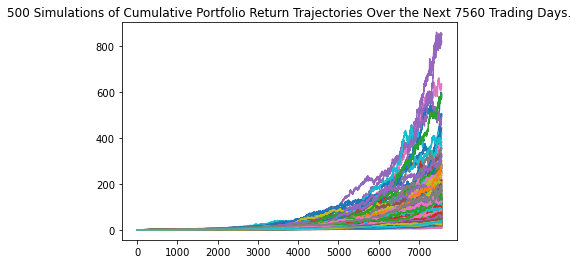

In [182]:
# Here we can visualize the 30 year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_forecast_line = thirty_year_forecast.plot_simulation()
thirty_year_forecast_line

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

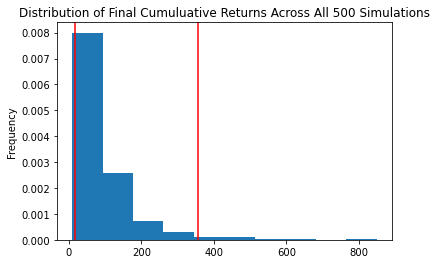

In [183]:
# This plot allows us to visualize the probability distribution of the 30 year Monte Carlo simulation 
# in histogram form
thirty_year_plot = thirty_year_forecast.plot_distribution()
thirty_year_plot

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [94]:
# Then we can generate summary statistics from the 30 year Monte Carlo simulation results
thirty_year_statistics = thirty_year_forecast.summarize_cumulative_return()

# Reviewing the 30 year Monte Carlo summary statistics
thirty_year_statistics

count           500.000000
mean             95.372238
std              87.738125
min               9.233675
25%              44.521192
50%              71.133047
75%             115.654537
max             812.807202
95% CI Lower     16.266779
95% CI Upper    346.511241
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [95]:
# From previous data above, we will print the current balance of the stock/bond portion of the members portfolio
print(total_stocks_bonds)

75294.6


In [195]:
# From the summary statistics, we can use the lower and upper `95%` confidence intervals
# to calculate the range of potential outcomes for the members current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirty_year_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = thirty_year_statistics[9] * total_stocks_bonds

# This print statement summarizes the lower and upper ranges
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the stocks/bonds portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return:.2f} to ${ci_upper_thirty_cumulative_return:.2f}.")


There is a 95% chance that an initial investment of $75294.6 in the stocks/bonds portfolio over the next 30 years will end within in the range of $1224800.63 to $26090425.28.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [185]:
# This Monte Carlo simulation will be a 10 year forecast of cumulative returns
# with weights at 20% for AGG (bonds) and 80% for SPY (stocks)
# We will run 500 samples at these parameters
ten_year_forecast = MCSimulation(
  portfolio_data = closing_prices_df,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)
# This allows us to review the simulation input data as a dataframe
ten_year_forecast.portfolio_data.head()


AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2019-01-04 00:00:00-05:00  106.66  106.72  106.55  106.695  7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2019-01-04 00:00:00-05:00          NaN  247.59  253.11  247.17  252.41   
2019-01-07 00:00:00-05:00    -0.002109  252.69  255.95  251.69  254.40   
2019-01-08 00:00:00-05:00    -0.000470  256.82  257.31  254.00  256.65   
2019-01-09 00:00:00-05:00     0.000564  257.56  258.91  241.40  257.71   
2019-01-10 00:00:00-05:00    -0.000892  256.26  259.16  255.50  258.94   

                                                   
                              volume daily_return  
time                                               
2019-01-04 00:00:00-05:00  122528832          NaN  
2019-01-07 00:00:00-05:00   88317608     0.007884  
2019-01-08 00:00:00-05:00   88864452     0.008844  
2019-01-09 00:00:00-05:00   77555720     0.004130  
2019-01-10 00:00:00-05:00   85909797     0.004773

In [186]:
# This is the code to run the Monte Carlo simulation
ten_year_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985016,1.003399,0.999039,0.997445,1.003634,1.018389,0.997720,0.996554,1.000380,1.004059,...,1.005550,1.008608,0.996638,1.012713,0.993467,1.001799,1.023194,1.005817,0.993152,1.005682
2,0.976072,1.025562,1.012875,1.004454,1.013621,1.023537,0.990036,0.989386,0.995162,1.007734,...,1.003044,1.012603,1.022670,1.020944,0.988145,0.996599,1.034029,1.010386,1.000962,1.006074
3,0.956284,1.042456,1.004770,1.008177,1.027996,1.014853,0.971762,1.019512,0.989827,1.000056,...,0.991199,1.030716,1.018179,1.033739,0.994878,0.986720,1.038537,1.005934,0.999806,1.013130
4,0.971826,1.029207,1.012290,1.002895,1.019134,1.028390,0.972871,1.018750,0.980273,0.992818,...,1.011613,1.017436,1.022559,1.040233,1.004765,0.998807,1.031198,0.991333,0.993013,1.019544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,12.223046,6.241775,3.430916,3.666055,5.055716,5.202516,2.166933,5.449900,6.814777,6.275803,...,6.054284,6.008172,5.296537,9.386568,3.082425,2.312883,4.306192,11.103032,9.180709,5.665356
2517,12.292073,6.277563,3.437693,3.687540,5.083292,5.206450,2.147033,5.386537,6.887973,6.314969,...,6.088442,6.040889,5.272127,9.384899,3.049493,2.296041,4.327440,11.097071,9.190938,5.649247
2518,12.171864,6.353060,3.405175,3.713739,5.107116,5.244292,2.164336,5.451186,6.814559,6.323948,...,6.142519,6.145384,5.318392,9.410127,3.063849,2.322490,4.318970,11.210347,9.178697,5.648088
2519,12.085937,6.426044,3.411955,3.687310,5.139705,5.202365,2.153730,5.520281,6.726399,6.390034,...,6.094601,6.142752,5.291370,9.715190,3.032059,2.260282,4.198701,11.128975,9.305114,5.703916


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

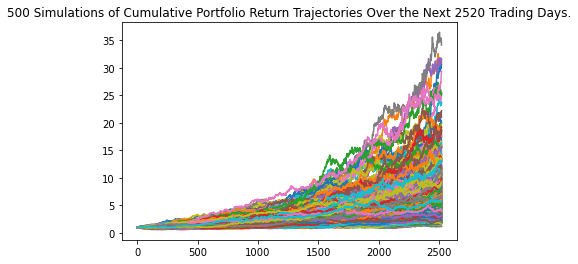

In [187]:
# Here we can visualize the 10 year Monte Carlo simulation by creating an
# overlay line plot
ten_year_forecast_line = ten_year_forecast.plot_simulation()
ten_year_forecast_line

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

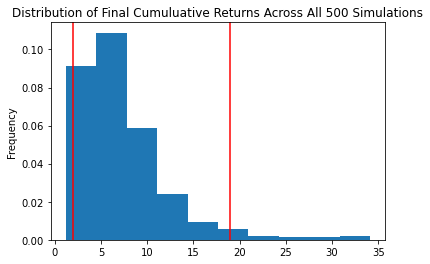

In [188]:
# This plot allows us to visualize the probability distribution of the 10 year Monte Carlo simulation 
# in histogram form
ten_year_plot = ten_year_forecast.plot_distribution()
ten_year_plot

In [190]:
# Then we can generate summary statistics from the 10 year Monte Carlo simulation results
ten_year_statistics = ten_year_forecast.summarize_cumulative_return()

# Reviewing the 10 year Monte Carlo summary statistics
ten_year_statistics

count           500.000000
mean              7.272947
std               4.700850
min               1.205218
25%               4.128273
50%               6.303788
75%               8.868527
max              34.113938
95% CI Lower      1.978763
95% CI Upper     18.913465
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [191]:
# As above, from previous data we will print the current balance of the stock/bond portion of the members portfolio
print(total_stocks_bonds)

75294.6


In [198]:
# From the summary statistics, again we can use the lower and upper `95%` confidence intervals
# to calculate the range of potential outcomes for the members current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_year_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = ten_year_statistics[9] * total_stocks_bonds

# This print statement summarizes the lower and upper ranges
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the stocks/bonds portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${ci_lower_ten_cumulative_return:.2f} to ${ci_upper_ten_cumulative_return:.2f}.")


There is a 95% chance that an initial investment of $75294.6 in the stocks/bonds portfolio over the next 10 years will end within in the range of $148990.21 to $1424081.75.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** Many factors should be considered when deciding an appropriate age to retire. Historically, the recommended withdrawal distribution has been 4% of ones retirement savings per year. Therefore one should consider not only what age to retire, but also the estimated life expectancy, which itself has multiple factors. Another consideration would be to determine if one wants to spend down the retirement principle savings or preserve the principal savings, for reasons such as health expenses may increase with age (unexpected injury, long-term illness, need for assisted living or in home nursing care to name a few), or to be able to leave an inheritance to family members. One must also consider other investments and savings outside of the above mentioned retirement plan. Choosing to retire after 10 years will involve significantly more risk than retiring at 30 years. One can also see that there is not much difference between the lower range for the 30 year plan vs the high range of the 10 year plan. My advice to these clients would be to stick with the 30 year plan as this will allow less risk, and very likely will have higher returns.